In [1]:
#!pip install tensorflow
#!pip install keras
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install time
#!pip install seaborn
#!pip install sklearn
#!pip install glob
#!pip install cv2


[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import pandas as pd

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

C:\Users\eduar\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
"""
Numerical simulation of bayesian networks
"""

'\nNumerical simulation of bayesian networks\n'

## My framework:

In [17]:
def sigmoid(x):
    return np.exp(x)/(1+np.exp(x))

In [18]:
def extractDigits(lst):
    return [x for x in map(lambda el: [el], lst)]

We know the variance is: 

$$\sigma^2 = \frac{\sum_i (x_i-\mu)^2}{N}$$

And we know $x_i \in \{0,1\}$. When $x_i = 1$ we then have

$$\sum_{\text{Number of 1's}} (1-\mu)^2 = \text{Number of 1's}\times (1-\mu)^2$$

and

$$\sum_{\text{Number of 0's}} (0-\mu)^2 = \text{Number of 0's}\times (\mu)^2$$

And we compute this in the code!

In [36]:
n_input = 4
n_output = 1

name = "weights_hidden1_units{}".format(n_input)
    #weights_hidden1 = np.random.random((n_input, n_output))
weights_hidden1 = np.random.uniform(-1, 1, (n_input, n_output))
biases_hidden1 = np.zeros((n_output,))

np.savetxt(name,weights_hidden1, fmt = "%1.15f") #We output the used random weights
precision = "0{}b".format(n_input) #When converting integer to binary representation

    #Modelo de tensorflow
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=n_output, activation='sigmoid', input_shape=(n_input,))
])
    
model.layers[0].set_weights([weights_hidden1, biases_hidden1])
    
t1 = time.time()
suma_total = 0
total_combinations = 0
for sample in range(2**(n_input)):
    combination_vector = []
    combination = format(sample,precision) #We get the number written in binary representation
        
    for char in range(len(combination)):
        combination_vector.append(int(combination[char]))
            
    # We now calculate the probability associated with this combination
    suma = np.dot(combination_vector, weights_hidden1[:,0])

In [37]:
suma

0.71104222218215

In [38]:
sum(weights_hidden1[:,0])

0.71104222218215

In [28]:
list([0.5])*n_input

[0.5, 0.5, 0.5, 0.5]

In [57]:
def main(n_input, n_output, n_samples):
    #n_input = 5
    #n_output = 1
    #n_samples = 2**5

    name = "weights_hidden1_units{}".format(n_input)
    #weights_hidden1 = np.random.random((n_input, n_output))
    weights_hidden1 = np.random.uniform(-1, 1, (n_input, n_output))
    biases_hidden1 = np.zeros((n_output,))

    np.savetxt(name,weights_hidden1, fmt = "%1.15f") #We output the used random weights
    precision = "0{}b".format(n_input) #When converting integer to binary representation

    #Modelo de tensorflow
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=n_output, activation='sigmoid', input_shape=(n_input,))
    ])
    
    model.layers[0].set_weights([weights_hidden1, biases_hidden1])
    
    t1 = time.time()
    suma_total = 0
    total_combinations = 0
    for sample in range(2**(n_input)):
        combination_vector = []
        combination = format(sample,precision) #We get the number written in binary representation
        
        for char in range(len(combination)):
            combination_vector.append(int(combination[char]))
            
        # We now calculate the probability associated with this combination
        suma = np.dot(combination_vector, weights_hidden1[:,0])

        prob1 = sigmoid(suma)
        prob0 = 1-prob1
        
        #Now we sample
        suma_1 = sum(random.choices([0,1], weights = [prob0, prob1], k = n_samples))
        suma_total = suma_total + suma_1
        total_combinations = total_combinations + n_samples

    res_sampling = suma_total/total_combinations

    

    tsampling = time.time()-t1
    
    #Predict with forward
    
    t1 = time.time()
    input_array = list([0.5])*n_input
    res_model = model.predict([list(input_array)])[0,0]
    t2 = time.time()-t1

    
    #We now calculate the variance
    #suma_1s = sum(df["suma"])*(1-final_probability_neuron_active)**2
    #suma_0s = (sum(df["Sampling_Cycles"])* n_samples - sum(df["suma"]))*(final_probability_neuron_active)**2
    #variance = (suma_1s+suma_0s)/(sum(df["Sampling_Cycles"])* n_samples)
    
    
    
    #print("Probabilidad final de neurona = 1: {}".format(final_probability_neuron_active))
    return res_sampling, tsampling, res_model, t2, total_combinations

In [72]:
#main(n_input = 2, n_output = 1, n_samples = 2**3)
#To test!
2**15

32768

## We now create main

In [74]:
input_changes = range(30,128)
#sampling_result = []
#forward_result = []
#tsampling = []
#tforward = []
#number_samples = []

n_samples = 2**5

with tf.device("/GPU:0"):
    for change in input_changes:
        print("Number of incoming neurons: ", change)
        output = main(n_input = change, n_output = 1, n_samples = n_samples)
        sampling_result.append(output[0])
        tsampling.append(output[1])
        forward_result.append(output[2])
        tforward.append(output[3])
        number_samples.append(output[4])
        
np.savetxt("resultados_sampling",sampling_result, fmt = "%1.15f") #We output the used random weights
np.savetxt("resultados_forward",forward_result, fmt = "%1.15f") #We output the used random weights

Number of incoming neurons:  30


KeyboardInterrupt: 

Maximum difference between two arrays:  0.06510670483112335


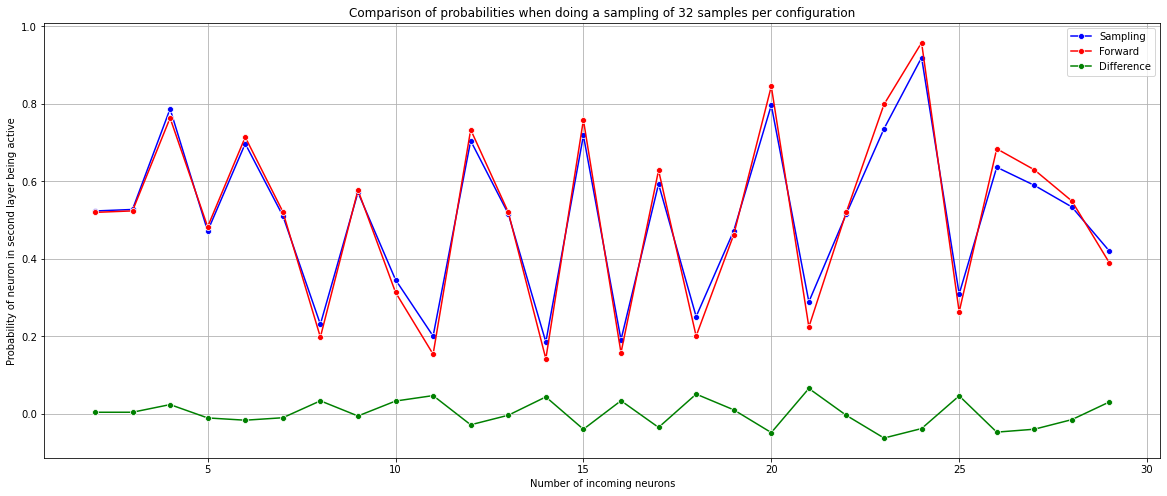

In [65]:
import seaborn as sns

difference = np.array(sampling_result)-np.array(forward_result)
name = "Comparison of probabilities when doing a sampling of {} samples per configuration".format(n_samples)
fig,ax = plt.subplots(figsize=(20,8))

sns.lineplot(x=input_changes[0:len(sampling_result)], y = sampling_result, label = "Sampling", color = "blue", marker = "o")
sns.lineplot(x=input_changes[0:len(forward_result)], y = forward_result, label = "Forward", color = "red", marker = "o")
sns.lineplot(x=input_changes[0:len(difference)], y = difference, label = "Difference", color = "green", marker = "o")
#sns.lineplot(x=input_changes[0:len(difference)], y = variance, label = "Variance", color = "orange", marker = "o")


ax.set_title(name)
ax.legend()

ax.set_xlabel("Number of incoming neurons")
ax.set_ylabel("Probability of neuron in second layer being active")
#ax.set_ylim([0.5,1.02])
plt.grid()
#plt.savefig("probability.pdf")

print("Maximum difference between two arrays: ", max(np.array(sampling_result)-np.array(forward_result)))

Maximum difference between two arrays:  0.06510670483112335


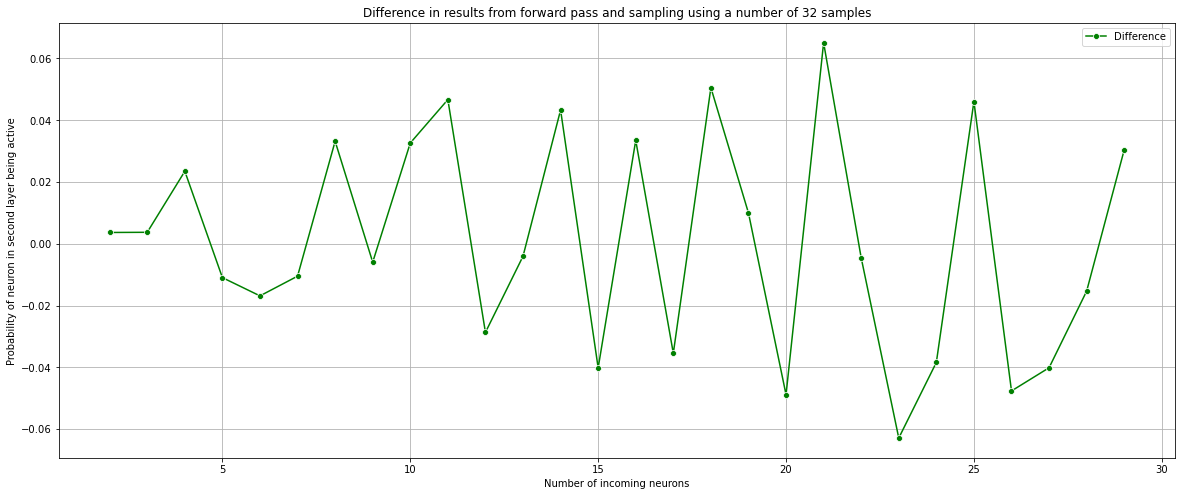

In [66]:
difference = np.array(sampling_result)-np.array(forward_result)
name = "Difference in results from forward pass and sampling using a number of {} samples".format(n_samples)
fig,ax = plt.subplots(figsize=(20,8))


sns.lineplot(x=input_changes[0:len(difference)], y = difference, label = "Difference", color = "green", marker = "o")

ax.set_title(name)
ax.legend()

ax.set_xlabel("Number of incoming neurons")
ax.set_ylabel("Probability of neuron in second layer being active")
#ax.set_ylim([0.5,1.02])
plt.grid()
#plt.savefig("difference.pdf")

print("Maximum difference between two arrays: ", max(np.array(sampling_result)-np.array(forward_result)))

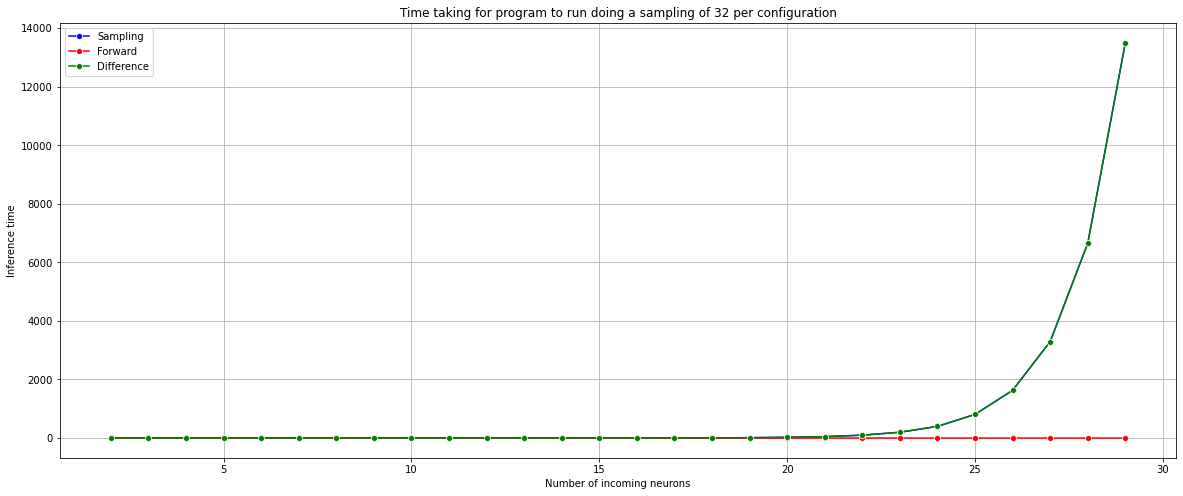

In [67]:
name = "Time taking for program to run doing a sampling of {} per configuration".format(n_samples)
fig,ax = plt.subplots(figsize=(20,8))

difference2 = np.array(tsampling)-np.array(tforward)
sns.lineplot(x=input_changes[0:len(tsampling)], y = tsampling, label = "Sampling", color = "blue", marker = "o")
sns.lineplot(x=input_changes[0:len(tforward)], y = tforward, label = "Forward", color = "red", marker = "o")
sns.lineplot(x=input_changes[0:len(difference2)], y = difference2, label = "Difference", color = "green", marker = "o")

ax.set_title(name)
ax.legend()

ax.set_xlabel("Number of incoming neurons")
ax.set_ylabel("Inference time")
plt.grid()
#plt.savefig("Time.pdf")

In [ ]:
name = "Total number of samples as a function of incoming neurons and {} samples per neuron configuration".format(n_samples)
fig,ax = plt.subplots(figsize=(20,8))

#difference2 = np.array(tsampling)-np.array(tforward)
sns.lineplot(x=input_changes[0:len(tsampling)], y = number_samples, label = "number_samples", color = "orange", marker = "o")


ax.set_title(name)
ax.legend()

ax.set_xlabel("Number of incoming neurons")
ax.set_ylabel("Number of samples")
plt.grid()